In [1]:
import tensorflow as tf 
import numpy as np
from utils import *
from DataGenerator import DataGenerator
import matplotlib.pyplot as plt

In [2]:
#create training dataset
path = 'D:/Files/Datasets/DeepStab Dataset/'
data_generator = DataGenerator(path,(256,256,3),5,6)

output_signature = (tf.TensorSpec(shape = (None, None, 5), dtype = tf.float32),
                    tf.TensorSpec(shape = (None, None, 3), dtype = tf.float32),
                    tf.TensorSpec(shape = (None, None, 3), dtype = tf.float32)
                    )
train_ds = tf.data.Dataset.from_generator(data_generator,
                                          output_signature = output_signature)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.batch(1)
train_ds = train_ds.cache('./Cache/').prefetch(buffer_size = AUTOTUNE)

In [3]:
generator = build_generator()
d1 = build_discriminator((256,256,8))
d2 = build_discriminator((256,256,18))
generator.summary()

Building STN Localization Network
Building STN Localization Network
Building STN Localization Network
Building STN Localization Network
Building STN Localization Network
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_1 (InputLayer)           [(None, 256, 256, 5  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatena

In [4]:
from DCGAN import GAN
initialA = tf.zeros(shape = (1,256,256,15), dtype=tf.float32)
gan = GAN(d1 ,d2 , generator, initialA)

In [5]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1= 0.5, beta_2=0.999)
d1_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1= 0.5, beta_2=0.999)
d2_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1= 0.5, beta_2=0.999)

gan.compile(d1_optimizer, d2_optimizer, generator_optimizer)

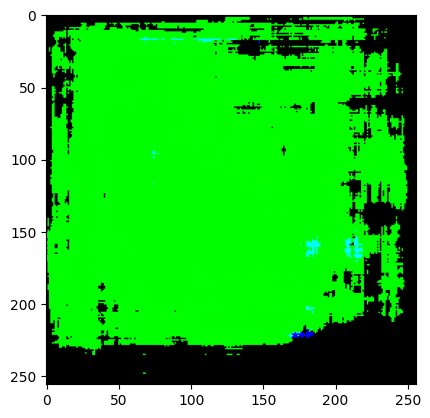

In [6]:
s , It, Igt = next(data_generator())
s = np.expand_dims(s,0)
It = np.expand_dims(It,0)
generated_frame,_ = generator([s,It])
img = np.array(generated_frame[0,...],dtype = np.uint8)
plt.imshow(img)

In [ ]:
generated_frame.shape

TensorShape([1, 256, 256, 3])

In [ ]:
img = generated_frame.numpy()
img = np.squeeze(img , axis = 0 )

In [ ]:
img.shape

(256, 256, 3)